In [1]:
# Import packages and dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

GasUsage = pd.read_csv('../data/GasUsage_complete.csv')
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,"Tuesday, July 12, 2022",0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,"Monday, July 11, 2022",0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,"Sunday, July 10, 2022",0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,"Saturday, July 9, 2022",0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,"Friday, July 8, 2022",0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,"Sunday, February 14, 2021",5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,"Saturday, February 13, 2021",4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,"Friday, February 12, 2021",6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,"Thursday, February 11, 2021",6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


In [2]:
# Convert date feature to YYYY-MM-DD

GasUsage['Date'] = pd.to_datetime(GasUsage['Date'])
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,2022-07-12,0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,2022-07-11,0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,2022-07-10,0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,2022-07-09,0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,2022-07-08,0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


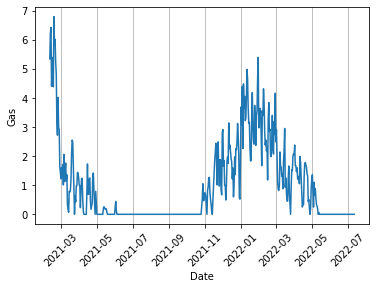

In [3]:
# Time plot of gas usage by date

sns.lineplot(data=GasUsage, x='Date', y='Gas')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Gas')
plt.grid(axis='x')

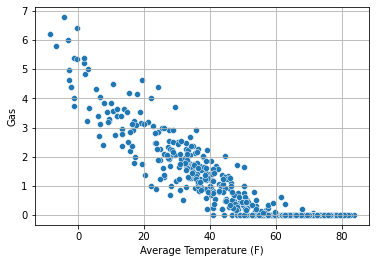

In [4]:
sns.scatterplot(data=GasUsage, x='Average', y='Gas')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Gas')
plt.grid()

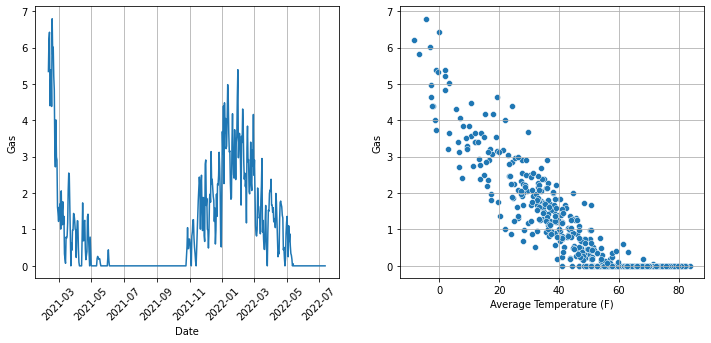

In [5]:
# Combine plots in a single plotting window
# plt.subplot(rows, columns, plot index)

plt.rcParams["figure.figsize"] = (12, 5)

# YOUR CODE GOES HERE

plt.subplot(1, 2, 1)
sns.lineplot(data=GasUsage, x='Date', y='Gas')
plt.xlabel('Date')
plt.ylabel('Gas')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.scatterplot(data=GasUsage, x='Average', y='Gas')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Gas')
plt.grid()

In [6]:
# Remove days with no gas usage

# YOUR CODE GOES HERE
GasUsageNoZeros = GasUsage[GasUsage.Gas != 0]
GasUsageNoZeros

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
60,2022-05-13,0.06,58,71.29,85,14.485,0.0,7.0,1.0,6.732,1.08,0
62,2022-05-11,0.18,42,57.00,68,15.403,0.0,0.0,1.0,9.819,2.81,0
63,2022-05-10,0.29,48,54.15,63,6.826,0.0,7.0,1.0,9.191,1.12,0
64,2022-05-09,0.34,48,52.52,59,5.778,0.0,7.0,1.0,7.993,1.31,0
65,2022-05-08,0.55,35,44.97,60,15.215,0.0,7.0,1.0,9.157,1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


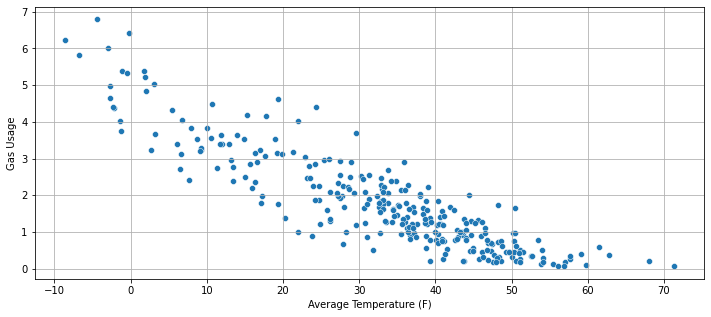

In [7]:
# Scatterplot of gas usage by temperature

sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel("Average Temperature (F)")
plt.ylabel("Gas Usage")
plt.grid()

In [8]:
# Fit linear regression model

temps = np.asarray(GasUsageNoZeros['Average']).reshape(-1, 1)
gas = np.asarray(GasUsageNoZeros['Gas']).reshape(-1, 1)

regr = LinearRegression()
regr.fit(temps, gas)
coeff = regr.coef_
intercept = regr.intercept_
print(f"Slope = {coeff}\nIntercept = {intercept}")

Slope = [[-0.07752534]]
Intercept = [4.3647434]


In [9]:
# Make a prediction for input 7
x_value = np.array([7]).reshape(-1, 1)
regr.predict(x_value)

array([[3.822066]])

Text(36, 6, 'Gas = 4.365 -0.078(Temp)')

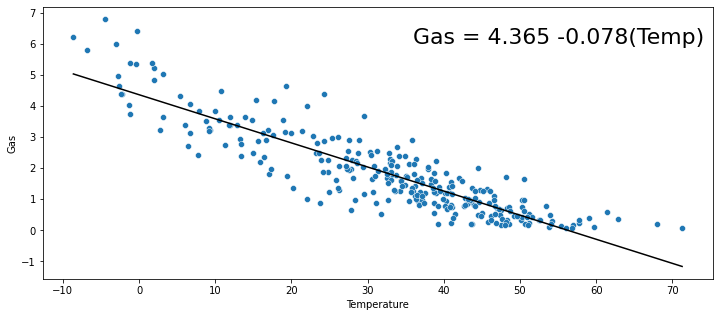

In [10]:
# Scatterplot of gas usage by temperature, with regression line and equation
sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel("Temperature")
plt.ylabel("Gas")
fit_line = {'temps':temps, 'y':coeff*temps+intercept}
fit_line['temps'] = fit_line['temps'].reshape(-1,)
fit_line['y'] = fit_line['y'].reshape(-1,)
fit_line_df = pd.DataFrame(fit_line, columns=['temps', 'y'])
sns.lineplot(data=fit_line, x='temps', y='y', color='black')
plt.text(36, 6, f"Gas = {intercept[0]:.3f} {coeff[0][0]:.3f}(Temp)", fontsize = 22)

[[-0.11409803  0.00064184]] [4.71668019]


Text(7, 7.5, 'Polynomial model (degree=2)')

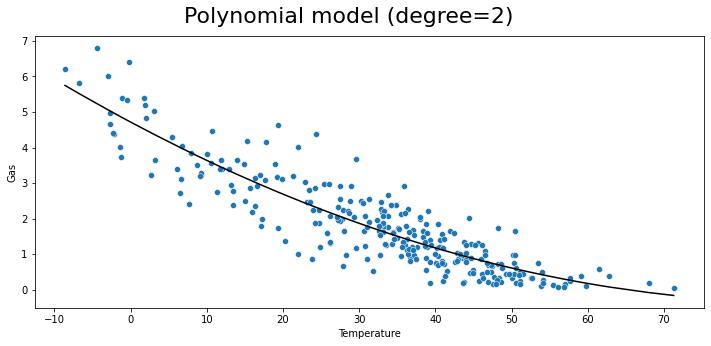

In [11]:
# Scatterplot of gas usage by temperature with degree 2 polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(temps.reshape(-1, 1))
poly_regr_model = LinearRegression()
poly_regr_model.fit(poly_features, gas)
print(poly_regr_model.coef_, poly_regr_model.intercept_)
gas_predicted = poly_regr_model.predict(poly_features)

sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
fit_line_2 = {'temp':GasUsageNoZeros['Average'], 'gas':gas_predicted}
fit_line_2['temp'] = np.asarray(fit_line_2['temp']).reshape(-1,)
fit_line_2['gas'] = fit_line_2['gas'].reshape(-1,)
fit_line_df_2 = pd.DataFrame(fit_line_2, columns=['temp', 'gas'])
sns.lineplot(data=fit_line_df_2, x='temp', y='gas', color='black')
plt.text(7, 7.5, f"Polynomial model (degree=2)", fontsize = 22)

Text(7, 7.5, 'Polynomial model (degree=3)')

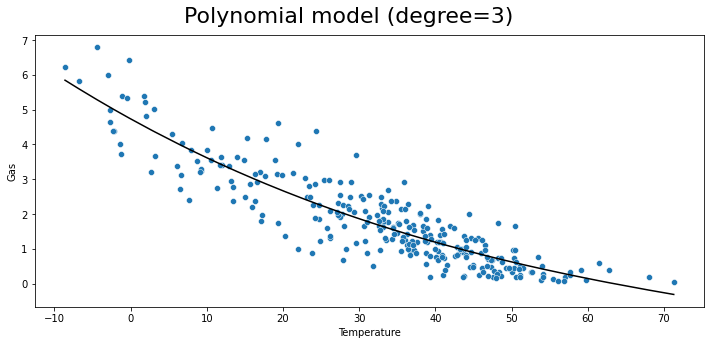

In [12]:
# Scatterplot of gas usage by temperature with degree 3 polynomial model
poly_2 = PolynomialFeatures(degree=3, include_bias=False)
poly_features_2 = poly_2.fit_transform(temps.reshape(-1, 1))
poly_regr_model_2 = LinearRegression()
poly_regr_model_2.fit(poly_features_2, gas)

gas_predicted_2 = poly_regr_model_2.predict(poly_features_2)

sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
fit_line_3 = {'temp':GasUsageNoZeros['Average'], 'gas':gas_predicted_2}
fit_line_3['temp'] = np.asarray(fit_line_3['temp']).reshape(-1,)
fit_line_3['gas'] = fit_line_3['gas'].reshape(-1,)
fit_line_df_3 = pd.DataFrame(fit_line_3, columns=['temp', 'gas'])
sns.lineplot(data=fit_line_3, x='temp', y='gas', color='black')
plt.text(7, 7.5, f"Polynomial model (degree=3)", fontsize=22)

Text(7, 7.5, 'Polynomial model (degree=4)')

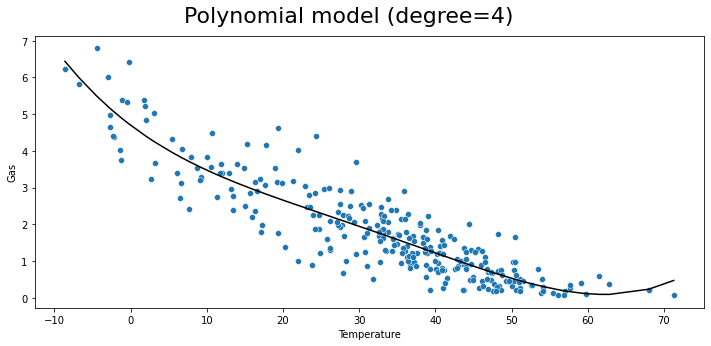

In [13]:
# Scatterplot of gas usage by temperature with degree 4 model
poly_3 = PolynomialFeatures(degree=4, include_bias=False)
poly_features_3 = poly_3.fit_transform(temps.reshape(-1, 1))
poly_regr_model_3 = LinearRegression()
poly_regr_model_3.fit(poly_features_3, gas)
gas_predicted_3 = poly_regr_model_3.predict(poly_features_3)

sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
fit_line_4 = {'temp':GasUsageNoZeros['Average'], 'gas':gas_predicted_3}
fit_line_4['temp'] = np.asarray(fit_line_4['temp']).reshape(-1,)
fit_line_4['gas'] = fit_line_4['gas'].reshape(-1,)
fit_line_df_4 = pd.DataFrame(fit_line_4, columns=['temp', 'gas'])
sns.lineplot(data=fit_line_4, x='temp', y='gas', color='black')
plt.text(7, 7.5, "Polynomial model (degree=4)", fontsize=22)

Text(0.5, 1.0, 'Polynomial model (degree=4)')

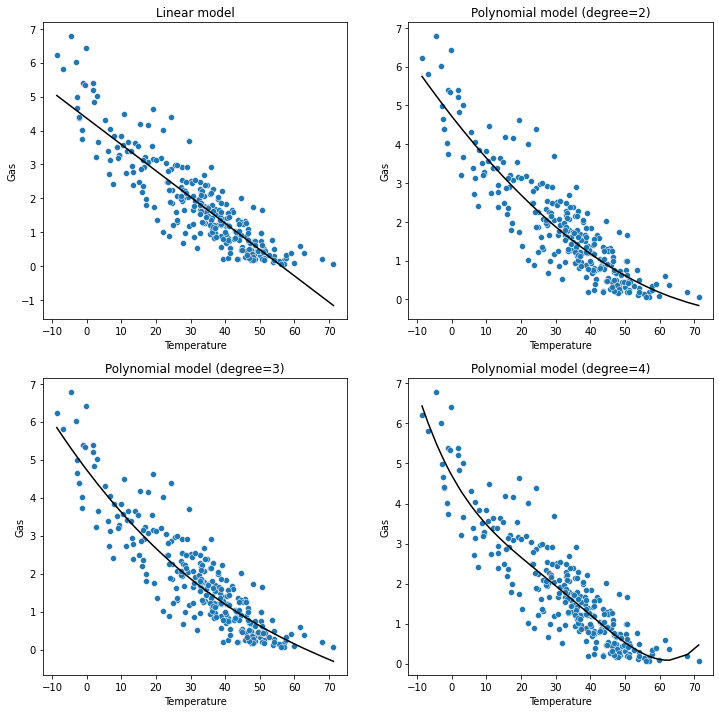

In [14]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 12)

plt.subplot(2, 2, 1)
# YOUR CODE GOES HERE
sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
sns.lineplot(data=fit_line, x='temps', y='y', color='black')
plt.title('Linear model')

plt.subplot(2, 2, 2)
# YOUR CODE GOES HERE
sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
sns.lineplot(data=fit_line_df_2, x='temp', y='gas', color='black')
plt.title("Polynomial model (degree=2)")

plt.subplot(2, 2, 3)
# YOUR CODE GOES HERE
sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
sns.lineplot(data=fit_line_3, x='temp', y='gas', color='black')
plt.title("Polynomial model (degree=3)")

plt.subplot(2, 2, 4)
# YOUR CODE GOES HERE
sns.scatterplot(data=GasUsageNoZeros, x='Average', y='Gas')
plt.xlabel('Temperature')
plt.ylabel('Gas')
sns.lineplot(data=fit_line_4, x='temp', y='gas', color='black')
plt.title("Polynomial model (degree=4)")

In [15]:
# Import and view the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

customer_churn = pd.read_csv('../data/customer_churn.csv')
customer_churn.groupby(by='churn').size()

churn
0    7963
1    2037
dtype: int64

Text(0, 0.5, 'Count')

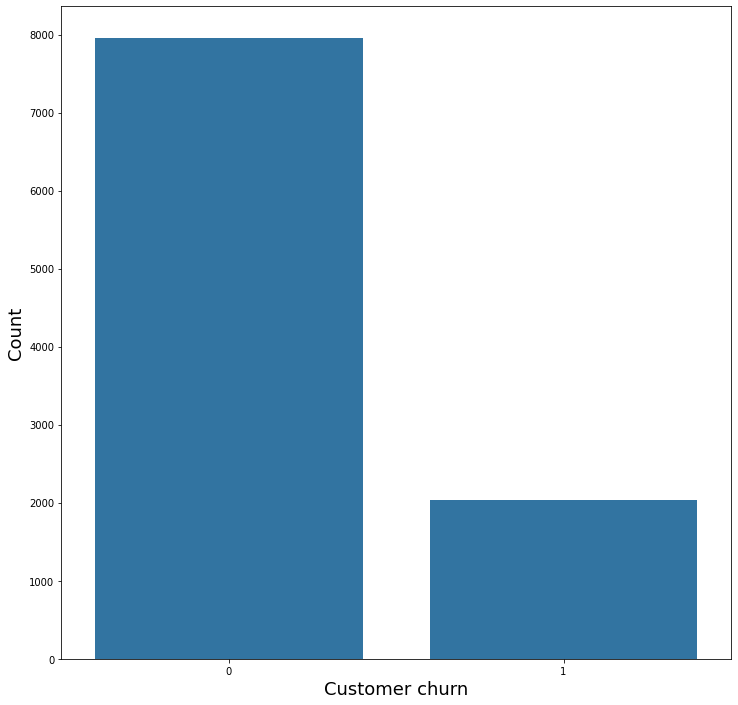

In [16]:
sns.barplot(data=customer_churn.groupby(by='churn').size())
plt.xlabel('Customer churn', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0.5, 0, 'Number of products')

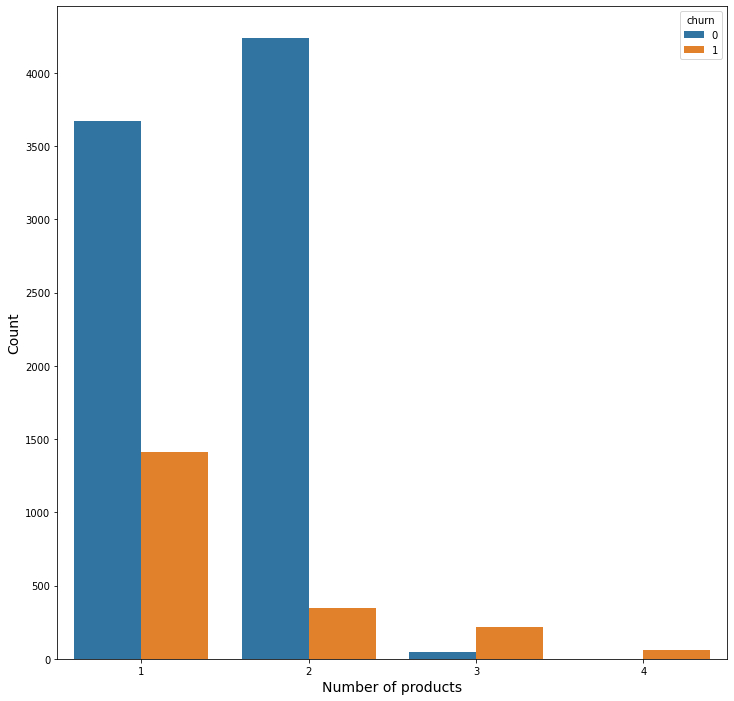

In [17]:
sns.countplot(customer_churn, x="products_number", hue="churn")
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of products", fontsize=14)

c:\Users\rtoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:xlabel='age', ylabel='churn'>

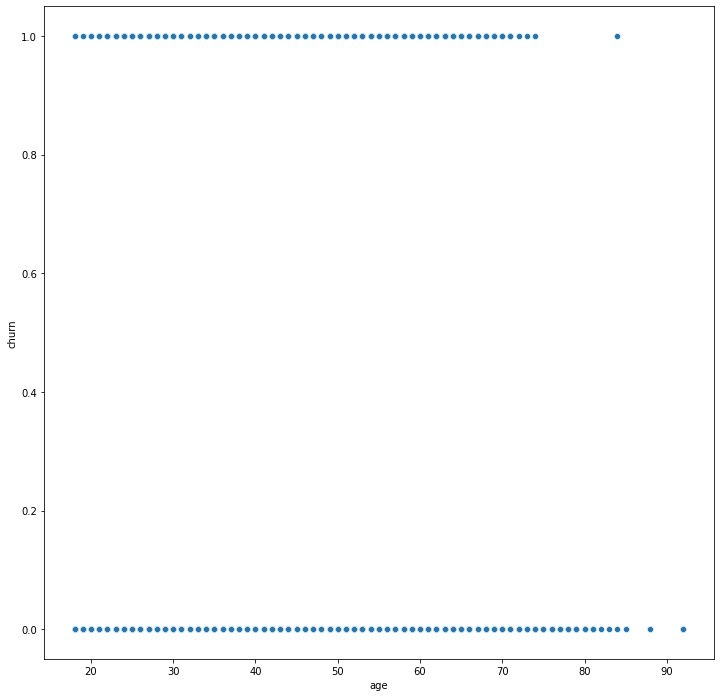

In [18]:
# Fits a logistic regression model with age as input and generate the following plot.
age = np.asarray(customer_churn['age']).reshape(-1, 1)
churn = np.asarray(customer_churn['churn']).reshape(-1, 1)
clf = LogisticRegression(random_state=0).fit(age, churn)
predictions = clf.predict(age)
# plt.scatter(x=age, y=churn)
# plt.xlabel("Churn (1=yes, 0=no)")
sns.scatterplot(data=pd.DataFrame(predictions), x=customer_churn['age'], y=customer_churn['churn'], alpha=1)

In [19]:
# Fit the logisitc regression model and print coefficients

print(f"Slope coefficient: {clf.coef_}\nIntercept coefficient: {clf.intercept_}")

Slope coefficient: [[0.06294447]]
Intercept coefficient: [-3.92858767]


<AxesSubplot:xlabel='age', ylabel='churn'>

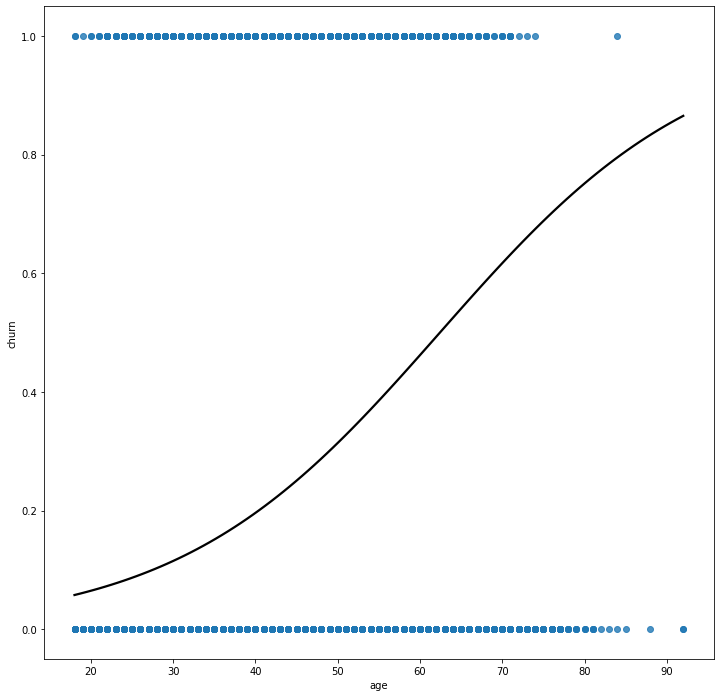

In [20]:
# Plot fitted logistic regression model
sns.regplot(data=customer_churn, x='age', y='churn', logistic=True, ci=None, line_kws={'color':'black'})

In [21]:
# Make a prediction for input 25

clf.predict_proba(np.array([25]).reshape(-1, 1))

array([[0.91332894, 0.08667106]])

In [22]:
# Fit a multiple logistic regression model with account balance, age, and credit score and print coefficients.

balance = np.asarray(customer_churn['balance']).reshape(-1, 1)
credit_score = np.asarray(customer_churn['credit_score']).reshape(-1, 1)
X = np.concatenate([balance, age, credit_score], axis=1)
clf_2 = LogisticRegression(random_state=0).fit(X, np.ravel(churn.astype(int)))
print(f"Slope coefficient: {clf_2.coef_}\nIntercept coefficient: {clf_2.intercept_}")

Slope coefficient: [[ 3.56096158e-06  4.28263120e-02 -5.18934900e-03]]
Intercept coefficient: [-0.00019447]


**Multiple Logistic Regression Model for Customer Churn**  


In [23]:
# Make a prediction for input [1000, 21, 650]

clf_2.predict_proba(np.array([[1000, 21, 650]]))

array([[0.92203749, 0.07796251]])

Text(0, 0.5, 'Credit score')

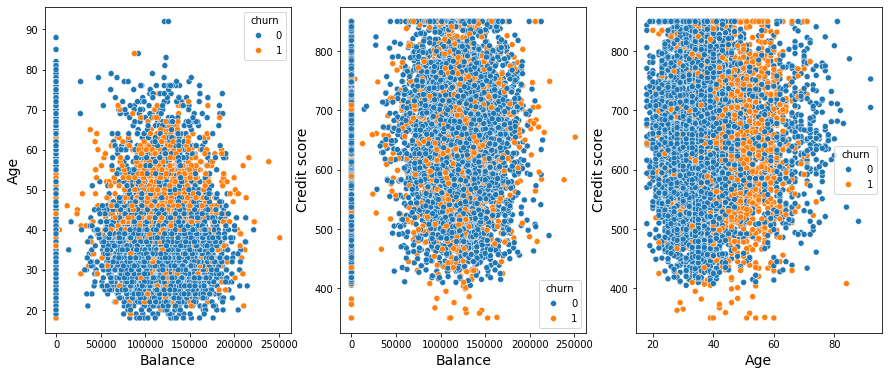

In [24]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (15, 6)

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_churn, x='balance', y='age', hue='churn')
plt.xlabel("Balance", fontsize=14)
plt.ylabel("Age", fontsize=14)

# YOUR CODE GOES HERE

plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_churn, x='balance', y='credit_score', hue='churn')
plt.xlabel("Balance", fontsize=14)
plt.ylabel("Credit score", fontsize=14)

# YOUR CODE GOES HERE

plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_churn, x='age', y='credit_score', hue='churn')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Credit score", fontsize=14)

# YOUR CODE GOES HERE